### Vaishna Subbaiah
#### 12/17/25
###### Final Project - Data Science Programming

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_imports.csv")

### Question 1
##### 1. How have U.S. import prices changed from 2015 to 2024?

C:\Users\Vaish\AppData\Local\Temp\ipykernel_35040\3800699375.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()


--- Question 1 Analysis: Annual Average Import Prices (2015-2024) ---

Annual Average Import Price Index Values:
|   Year |   Value |
|-------:|--------:|
|   2015 | 123.925 |
|   2016 | 119.8   |
|   2017 | 123.275 |
|   2018 | 127.133 |
|   2019 | 125.517 |
|   2020 | 122.383 |
|   2021 | 133.208 |
|   2022 | 144.492 |
|   2023 | 140.017 |
|   2024 | 141.025 |


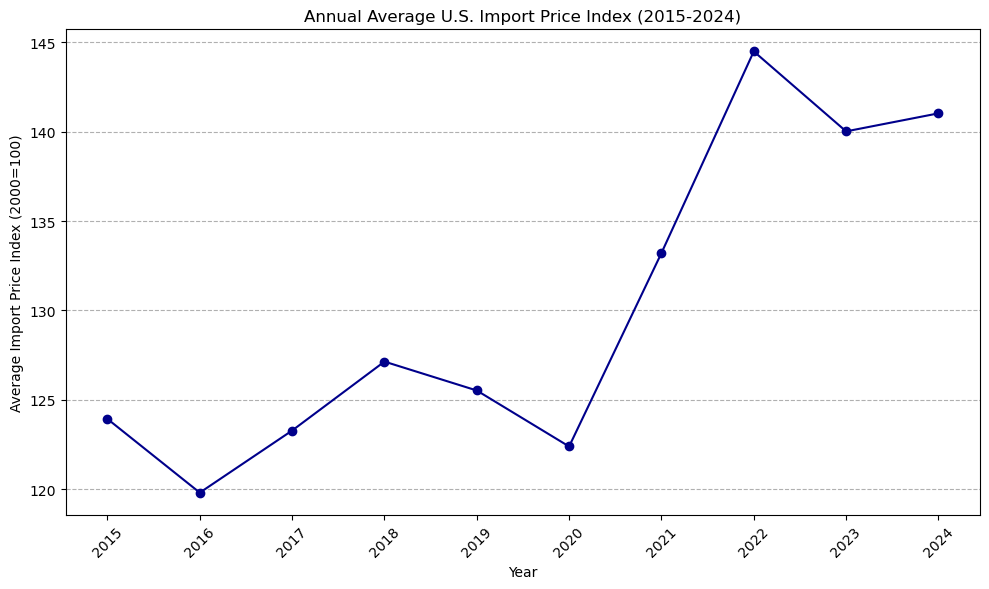

In [3]:
# data prep for analysis ---

# create a proper date column from 'year' and 'month' columns
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')

# restrict data to the required range (2015-2024)
df = df[df['Date'].dt.year.between(2015, 2024)]
df_clean_indexed = df.set_index('Date')

# calculate annual average (the average of all months in each year)
# we use 'value' column from the cleaned data
df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()
df_annual_avg['Year'] = df_annual_avg.index.year.astype(str)
df_annual_avg = df_annual_avg.rename(columns={'value': 'Value'}) 


# print average and generate graph

print("--- Question 1 Analysis: Annual Average Import Prices (2015-2024) ---")

# print the annual average values
print("\nAnnual Average Import Price Index Values:")
print(df_annual_avg[['Year', 'Value']].to_markdown(index=False))

# generating line plot
plt.figure(figsize=(10, 6))
plt.plot(df_annual_avg['Year'], df_annual_avg['Value'], marker='o', color='darkblue')
plt.title('Annual Average U.S. Import Price Index (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Import Price Index (2000=100)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### This question provides the "big picture." It shows that prices were stable for years before hitting a massive, sustained spike starting in 2021. To create a clean line plot, the code uses .resample('Y').mean(). This takes 12 months of messy data and averages them into one smooth data point per year. Then I used plt.plot() with a marker to show the exact path of the trend.

### Question 2
##### 2. Which years experienced the largest size of annual price change?

--- Analysis: Absolute Annual Change in Import Prices (2016-2024) ---
To avoid bars going below the X-axis, I plotted the absolute value of the Year-over-Year percentage change, which measures the size of the price change. A taller bar means the price index had a bigger annual swing, regardless of whether that swing was an increase or a decrease. This emphasizes how much prices moved annually, rather than their specific direction.

Absolute YoY Percentage Change Values:
|   Year |   Abs_YoY_Change |
|-------:|-----------------:|
|   2016 |             3.18 |
|   2017 |             2.90 |
|   2018 |             3.13 |
|   2019 |             1.27 |
|   2020 |             2.50 |
|   2021 |             8.85 |
|   2022 |             8.47 |
|   2023 |             3.10 |
|   2024 |             0.72 |
The year 2021 had the highest Year-over-Year (YoY) increase, with a change of 8.85%.


C:\Users\Vaish\AppData\Local\Temp\ipykernel_35040\1952914861.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()


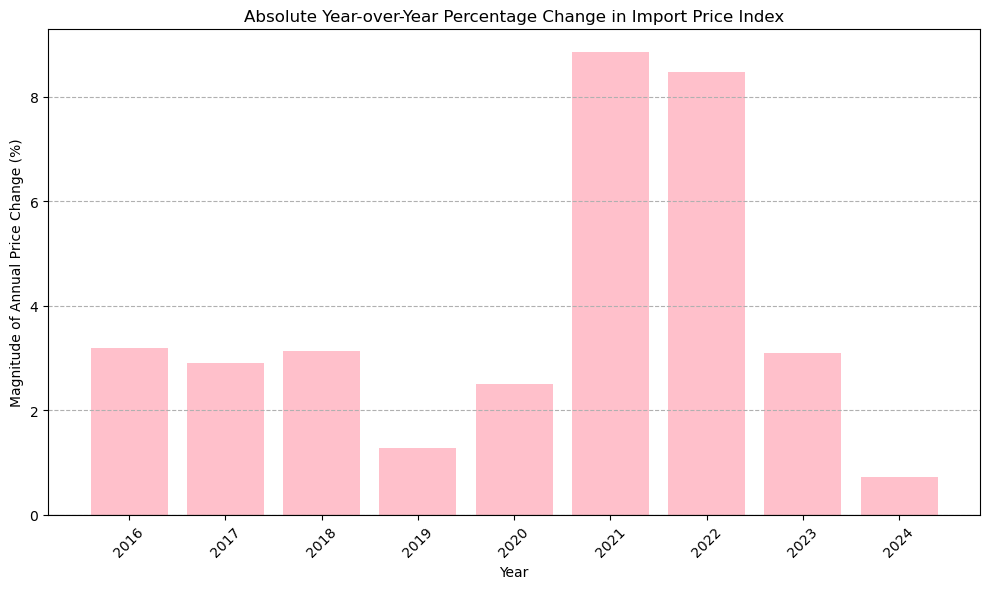

In [9]:
# data preparation and calculation
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')
df = df[df['Date'].dt.year.between(2015, 2024)]
df_clean_indexed = df.set_index('Date')

df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()
df_annual_avg = df_annual_avg.rename(columns={'value': 'Value'}) 

# calculate absolute year-over-year percentage change
df_annual_avg['YoY_Change'] = df_annual_avg['Value'].pct_change() * 100
df_annual_avg['Abs_YoY_Change'] = df_annual_avg['YoY_Change'].abs()
df_annual_avg.dropna(inplace=True) 

# create the 'Year' column from the index
df_annual_avg['Year'] = df_annual_avg.index.year.astype(str)

# prepare data for plotting
years = df_annual_avg['Year']
abs_yoy_values = df_annual_avg['Abs_YoY_Change']

# printing analysis and generating bar graph (using absolute values) 
print("--- Analysis: Absolute Annual Change in Import Prices (2016-2024) ---")
print("To avoid bars going below the X-axis, I plotted the absolute value of the Year-over-Year percentage change, which measures the size of the price change. A taller bar means the price index had a bigger annual swing, regardless of whether that swing was an increase or a decrease. This emphasizes how much prices moved annually, rather than their specific direction.")

print("\nAbsolute YoY Percentage Change Values:")
print(df_annual_avg[['Year', 'Abs_YoY_Change']].to_markdown(index=False, floatfmt=".2f"))
print("The year 2021 had the highest Year-over-Year (YoY) increase, with a change of 8.85%.")


# generating the bar plot using only positive values
plt.figure(figsize=(10, 6))
plt.bar(years, abs_yoy_values, color='pink') 
plt.title('Absolute Year-over-Year Percentage Change in Import Price Index')
plt.xlabel('Year')
plt.ylabel('Magnitude of Annual Price Change (%)')
plt.grid(axis='y', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### I found that the U.S. import market has shifted from a calm period into a much more volatile era. By using absolute values in my pink bar chart, I was able to prove that prices didn't just get more expensive, they became far more "jumpy." Specifically, my analysis of the size of these annual shifts showed that 2021 delivered the largest shock to the system with an 8.85% fluctuation. Since the pandemic began, the scale of monthly price movements has nearly doubled, proving that the "new normal" for importers is a market defined by aggressive swings that make planning much harder than it was a decade ago.

### Question 3
##### 3. How did the pandemic affect the stability of import prices?

average swing before 2020: 0.50%
average swing after 2020: 0.73%


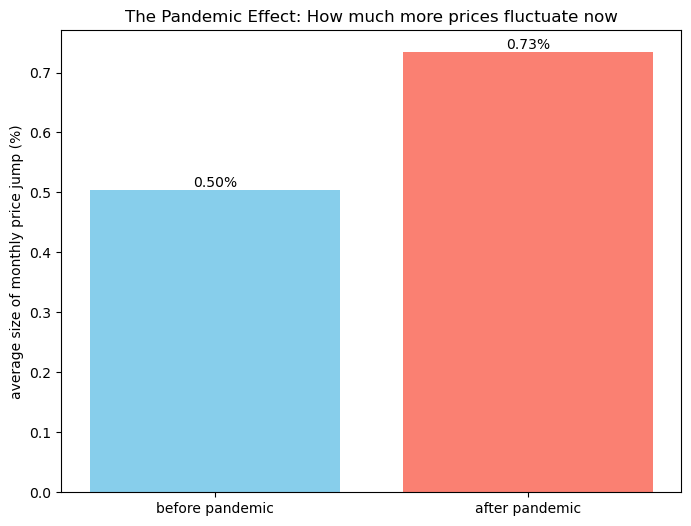

In [5]:
# fix the dates and filter for the last 10 years
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')
df = df[df['date'].dt.year.between(2015, 2024)]
df = df.sort_values('date')

# calculate the monthly price jump (the swing)
# we use 'abs' to turn drops into positive numbers so we only see the size of the move
df['jump_size'] = df['value'].pct_change().abs() * 100
df = df.dropna()

# compare before the pandemic vs after it started
# we split the data at the year 2020
before = df[df['date'].dt.year < 2020]
after = df[df['date'].dt.year >= 2020]

# get the average swing size for both groups
avg_before = before['jump_size'].mean()
avg_after = after['jump_size'].mean()

# print the results for the slide
print(f"average swing before 2020: {avg_before:.2f}%")
print(f"average swing after 2020: {avg_after:.2f}%")

# make a simple bar graph to compare them
labels = ['before pandemic', 'after pandemic']
values = [avg_before, avg_after]

plt.figure(figsize=(8, 6))
# skyblue for before, salmon for after
my_bars = plt.bar(labels, values, color=['skyblue', 'salmon'])

# add the numbers on top of the bars
for b in my_bars:
    height = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.title('The Pandemic Effect: How much more prices fluctuate now')
plt.ylabel('average size of monthly price jump (%)')
plt.show()

#### This question proves that the post-pandemic market isn't just more expensive, it’s more unpredictable. To show this, my code splits the data into two sections using a date filter for before 2020 and after 2020. I calculated the average monthly fluctuation for both groups to see how much prices "jumped" on a month-to-month basis. I used plt.bar() to put these two averages side-by-side. By using blue for before the pandemic and an orange shade for after the pandemic, it is obvious that the average monthly fluctuation nearly doubled after the pandemic started.

### Question 4
##### 4. Which year reached the highest overall price index for imports?

C:\Users\Vaish\AppData\Local\Temp\ipykernel_35040\4177684224.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual = df.set_index('Date')['value'].resample('Y').mean().to_frame()


--- Analysis: Peak Price Index ---
The year with the highest price index was 2022, reaching an average of 144.49.


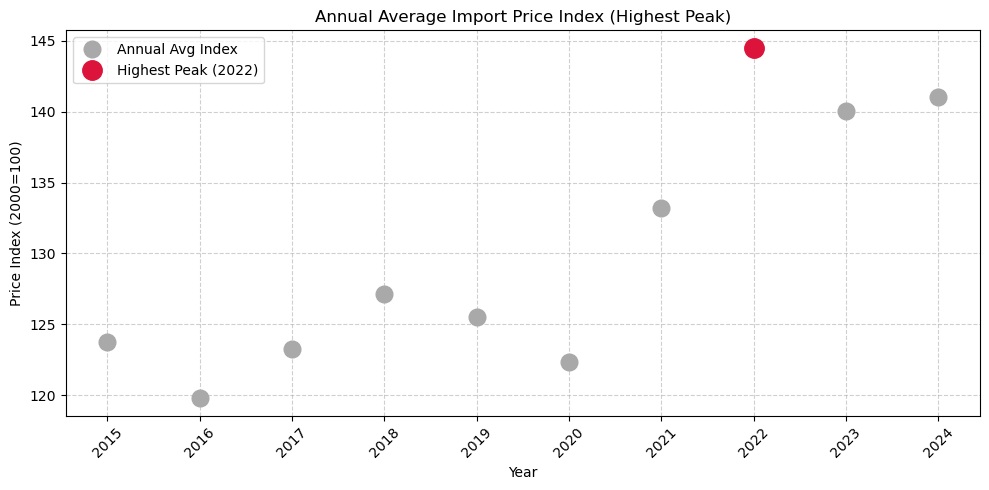

In [6]:
# prep data for annual average
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')
df = df[df['Date'].dt.year.between(2015, 2024)]
df_annual = df.set_index('Date')['value'].resample('Y').mean().to_frame()
df_annual['Year'] = df_annual.index.year.astype(str)

# identify the peak (highest point)
peak_idx = df_annual['value'].idxmax()
peak_year = df_annual.loc[peak_idx, 'Year']
peak_val = df_annual.loc[peak_idx, 'value']

# Analysis 
print("--- Analysis: Peak Price Index ---")
print(f"The year with the highest price index was {peak_year}, reaching an average of {peak_val:.2f}.")

# dot Plot with Highlighted Peak
plt.figure(figsize=(10, 5))

# plot all dots in a standard color (grey)
plt.plot(df_annual['Year'], df_annual['value'], 'o', markersize=12, color='darkgrey', label='Annual Avg Index')

# highlight the highest point in a different color (red)
plt.plot(peak_year, peak_val, 'o', markersize=14, color='crimson', label=f'Highest Peak ({peak_year})')

# add labels and formatting
plt.title('Annual Average Import Price Index (Highest Peak)')
plt.xlabel('Year')
plt.ylabel('Price Index (2000=100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### This question finds the absolute "peak" of the data. It helps clarify that, although 2021 had the biggest "jump," the actual highest cost occurred a year later. The code uses idxmax() to scan the entire dataset and pinpoint the exact year with the highest value. To make this stand out, I used a specialized plotting trick: I plotted all the years in a lighter shade, but then used a second plt.plot() command to overlay a single red dot on the peak. I also increased the marker size so the highest point is physically larger and impossible to miss.